<br/><br/><br/><br/><br/>
<font size=6>**Introduction to Working with U.S. Census Data in Python, Part III**</font>
<br/>
<font size=5>**PyData Seattle 2023**
<br/>
[**Darren Erik Vengroff, Ph.D.**](https://www.linkedin.com/in/vengroff/)
<br/>
April 23, 2023
</font>
<br/><br/><br/><br/>
<font size=6>**Exercise / Project Template**</font>

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Exercise / Project Template

This is an open-ended template that you can use to start
your own U.S. Census data research project building on
what you learned today.

It is a skeleton you can fill in to create your first 
full-blown Census-data-based research project.

## Getting Started

If you want to run this notebook yourself, we encourage you
to do so in whatever virtual environment you normally do your
work. It could be in an IDE like [VSCode](https://code.visualstudio.com/docs/datascience/jupyter-notebooks)
or a hosted notebook
environment like [google colab](https://colab.research.google.com/).
The only thing you have to do is `pip install censusdis`, or the
equivalent in your environment. Then you should be able to run
this notebook and whatever notebook(s) you derive from it.

## Resources

We encourage you to refer back to the two other notebooks we 
went through during the tutorial for tips, ideas, and code
you can copy and modify.

You can also look through the numerous sample notebooks at 
https://github.com/vengroff/censusdis/tree/main/notebooks.


## Imports

Here are some basic imports you are likely to need in your
work. You may want to adjust what state or states you import
in case you are focused on a different area.

In [100]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.states import PA


import pandas as pd

# Some of the names of variables get really long.
# This option ensures they are readable in the notebook.
pd.set_option('display.max_colwidth', 200)

## What is your research question?

As we did in our earlier notebooks, we'd like to formulate
the question as something along the lines of:

- What is/are the value of **\[demographic, economic, political, ... variable(s) \]** in **\[geographic location(s)\]**?

Examples we studied earlier were:

- What is the **median income** in **counties in Washington State**?
- How many **children under the age of 18 live in poverty** in **each census tract in Newark, NJ**?

Fill in the blanks below to formulate your own research question:

## My research question is:

What is/how many/how much _________________________ 
in _________________________?

## Find a group of variables related to you research question

In [101]:
DATASET = 'acs/acs5'
VINTAGE = 2021

In [102]:
df_groups = ced.variables.all_groups(DATASET, VINTAGE)

In [103]:
# Change the query here as needed to find a group or group
# of variables that interest you.

# In this example, we are interested in insurance and want
# to know how age affects coverage, and we are specifically
# interested in women. You should change this to keywords 
# relevant to your project.
df_groups[
    df_groups['DESCRIPTION'].str.contains('INCOME') &
    df_groups['DESCRIPTION'].str.contains('MEDIAN') &
    df_groups['DESCRIPTION'].str.contains('SEX') &
    df_groups['DESCRIPTION'].str.contains('ALONE')
]

,DATASET,YEAR,GROUP,DESCRIPTION
594,acs/acs5,2021,B19215,MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) BY SEX OF HOUSEHOLDER BY LIVING ALONE BY AGE OF HOUSEHOLDER


In [104]:
# This is the group we picked from the options we found
# above.
GROUP = 'B19215'

## Decide what variables we want to use

Look at the variables in your group, which ones are
leaves, and decide which are relevant to your research
question. You might want a subset of the leaves, like
we did in the Newark case study. You might want all the
leaves, or you might want all the variables.

One or more of the `ced.variables.*` queries in the following
few cells might help you find the variable(s) you want.

In [105]:
ced.variables.all_variables(DATASET, VINTAGE, GROUP)

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2021,acs/acs5,B19215,B19215_001E,Estimate!!Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --!!Total (dollars):,NaN,None
1,2021,acs/acs5,B19215,B19215_002E,Estimate!!Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --!!Total (dollars):!!Male householder --!!Total (dollars),NaN,None
2,2021,acs/acs5,B19215,B19215_003E,Estimate!!Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --!!Total (dollars):!!Male householder --!!Total (dollars)!!Living alone --!!Total (dollars),NaN,None
3,2021,acs/acs5,B19215,B19215_004E,Estimate!!Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --!!Total (dollars):!!Male householder --!!Total (dollars)!!Living alone --!!Total (dollars)!...,NaN,None
4,2021,acs/acs5,B19215,B19215_005E,Estimate!!Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --!!Total (dollars):!!Male householder --!!Total (dollars)!!Living alone --!!Total (dollars)!...,NaN,None
5,2021,acs/acs5,B19215,B19215_006E,Estimate!!Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --!!Total (dollars):!!Male householder --!!Total (dollars)!!Not living alone --!!Total (dollars),NaN,None
6,2021,acs/acs5,B19215,B19215_007E,Estimate!!Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --!!Total (dollars):!!Male householder --!!Total (dollars)!!Not living alone --!!Total (dolla...,NaN,None
7,2021,acs/acs5,B19215,B19215_008E,Estimate!!Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --!!Total (dollars):!!Male householder --!!Total (dollars)!!Not living alone --!!Total (dolla...,NaN,None
8,2021,acs/acs5,B19215,B19215_009E,Estimate!!Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --!!Total (dollars):!!Female householder --!!Total (dollars),NaN,None
9,2021,acs/acs5,B19215,B19215_010E,Estimate!!Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --!!Total (dollars):!!Female householder --!!Total (dollars)!!Living alone --!!Total (dollars),NaN,None


In [106]:
ced.variables.group_tree(DATASET, VINTAGE, GROUP)

+ Estimate
    + Median nonfamily household income in the past 12 months (in 2021 inflation-adjusted dollars) --
        + Total (dollars): (B19215_001E)
            + Male householder --
                + Total (dollars) (B19215_002E)
                    + Living alone --
                        + Total (dollars) (B19215_003E)
                            + Householder 15 to 64 years (dollars) (B19215_004E)
                            + Householder 65 years and over (dollars) (B19215_005E)
                    + Not living alone --
                        + Total (dollars) (B19215_006E)
                            + Householder 15 to 64 years (dollars) (B19215_007E)
                            + Householder 65 years and over (dollars) (B19215_008E)
            + Female householder --
                + Total (dollars) (B19215_009E)
                    + Living alone --
                        + Total (dollars) (B19215_010E)
                            + Householder 15 to 64 years (dollar

In [107]:
ced.variables.group_leaves(DATASET, VINTAGE, GROUP)
VARS_INCOME_SINGLE = ['B19215_002E', 'B19215_009E']

In [108]:
# Chose the right set of variables for your 
# particular research question. In this case,
# looking through the variables, leaves, and
# tree above, we came up with this formulation
# for the variables we want. Some times it's easy
# to define a set of variables like this. In other
# cases we might just hard-code variables like we
# did in the Newark example.

variables = [
    leaf
    for leaf in ced.variables.group_leaves(DATASET, VINTAGE, GROUP)
    if leaf > 'B19215_001E'
]
variables

['B19215_004E',
 'B19215_005E',
 'B19215_007E',
 'B19215_008E',
 'B19215_011E',
 'B19215_012E',
 'B19215_014E',
 'B19215_015E']

## Choose a geography

Now we have to choose what geographies we want to study.
This first query tells us all possible geographies.

In [109]:
list(ced.geographies(DATASET, VINTAGE))

[['us'],
 ['region'],
 ['division'],
 ['state'],
 ['state', 'county'],
 ['state', 'county', 'county_subdivision'],
 ['state', 'county', 'county_subdivision', 'subminor_civil_division'],
 ['state', 'county', 'county_subdivision', 'place_remainder_or_part'],
 ['state', 'county', 'tract'],
 ['state', 'county', 'tract', 'block_group'],
 ['state', 'place', 'county_or_part'],
 ['state', 'place'],
 ['state', 'consolidated_city'],
 ['state', 'consolidated_city', 'place_or_part'],
 ['state', 'alaska_native_regional_corporation'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_subdivision_remainder'],
 ['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only'],
 ['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_census_tract'],
 ['american_indian_area_alaska_native_area_hawaiian_home

In our hypothethical example, let's suppose we want
nationwide data at the county level. So when we make
our queries we'll use `state='*', county='*'` to get
all counties in all states.

In [110]:
df_data = ced.download(
    DATASET,
    VINTAGE,
    ['NAME'] + VARS_INCOME_SINGLE,
    
    state='42',
    county='*',
)

In [111]:
df_data.head()

,STATE,COUNTY,NAME,B19215_002E,B19215_009E
0,42,001,"Adams County, Pennsylvania",44425,34143
1,42,003,"Allegheny County, Pennsylvania",46923,35473
2,42,005,"Armstrong County, Pennsylvania",39614,23905
3,42,007,"Beaver County, Pennsylvania",42215,28745
4,42,009,"Bedford County, Pennsylvania",36659,21043


In [112]:
df_data.describe()

,B19215_002E,B19215_009E
count,67.000000,67.000000
mean,41459.477612,29225.910448
std,7776.978085,6044.600467
min,29196.000000,20234.000000
25%,36258.000000,25372.000000
50%,39221.000000,27917.000000
75%,46108.500000,32168.000000
max,67478.000000,51362.000000


## Analysis

At this point we have the U.S. Census data we want. It's in an
ordinary data frame, so we can do whatever analysis we need
to to answer our research question.

Assuming you made appropriate changes to the cells above to
locate the variables you want and query them for the geographies
you want, you are ready to move forward.

Good luck, both here and in your future work with U.S. Census data
in Python.

In [113]:
# get the state and the place
df_pa_places = ced.download(
    dataset=DATASET,
    vintage=VINTAGE,
    download_variables=['NAME'],
    
    state=PA,
    place='*'
)

In [114]:
df_pa_places[df_pa_places['NAME'].str.startswith('Pitt')] 

,STATE,PLACE,NAME
1299,42,61000,"Pittsburgh city, Pennsylvania"
1300,42,61048,"Pittston city, Pennsylvania"


In [115]:
PLACE_PIT = '61000'

In [116]:
gdf_pittsburgh = ced.download(
    DATASET,
    VINTAGE,
    ['NAME'] + VARS_INCOME_SINGLE,
    
    state=PA,
    place=PLACE_PIT,
    
    with_geometry=True
)

In [117]:
gdf_pittsburgh

,STATE,PLACE,NAME,B19215_002E,B19215_009E,geometry
0,42,61000,"Pittsburgh city, Pennsylvania",47143,33225,"POLYGON ((-80.09514 40.45927, -80.09468 40.45967, -80.08678 40.45986, -80.08391 40.45947, -80.08145 40.46062, -80.07993 40.46337, -80.07770 40.46474, -80.07671 40.46469, -80.07489 40.46368, -80.07..."


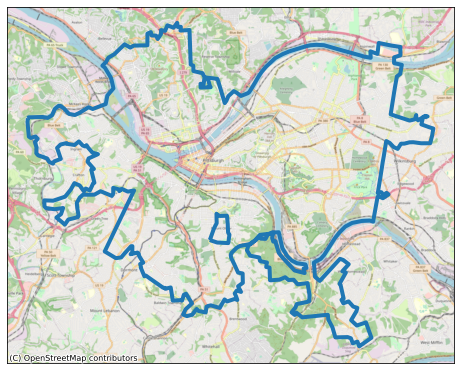

In [118]:
ax = cem.plot_map(
    gdf_pittsburgh.boundary,
    
    figsize=(8,8),
    linewidth=4,
    
    # Add a background map from OpenStreetMaps
    # so we can easily verify the geography.
    with_background=True,
)

In [119]:
gdf_allegheny_tracts = ced.download(
    dataset=DATASET,
    vintage=VINTAGE,
    download_variables=['NAME'] + VARS_INCOME_SINGLE,
    
    state=PA,
    county="003",
    tract="*",
    
    with_geometry=True
)

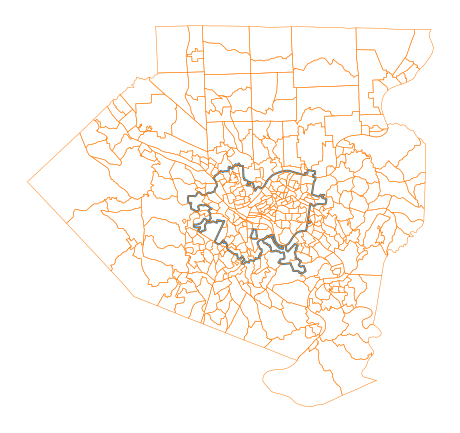

In [120]:
ax = gdf_pittsburgh.boundary.plot(
    linewidth=2,
    figsize=(8, 8)
)

ax = gdf_allegheny_tracts.boundary.plot(
    color='C1',
    linewidth=0.5,
    ax=ax
)

_ = ax.axis('off')

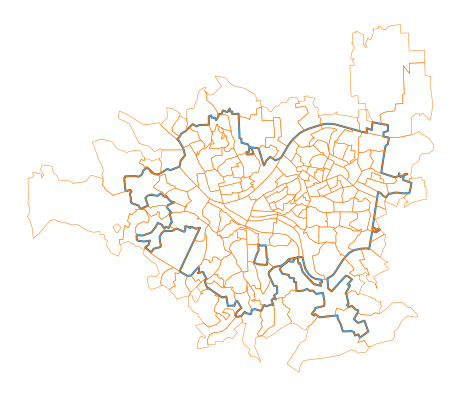

In [121]:
gdf_pittsburgh_allegheny_tracts = gdf_allegheny_tracts.sjoin(
    gdf_pittsburgh,
)

ax = gdf_pittsburgh.boundary.plot(
    linewidth=2,
    figsize=(8, 8)
)

ax = gdf_pittsburgh_allegheny_tracts.boundary.plot(
    color='C1',
    linewidth=0.5,
    ax=ax
)

_ = ax.axis('off')

In [122]:
gdf_pittsburgh_tracts = cem.sjoin_mostly_contains(
    gdf_large_geos=gdf_pittsburgh[['geometry']].copy(),
    gdf_small_geos=gdf_allegheny_tracts
)

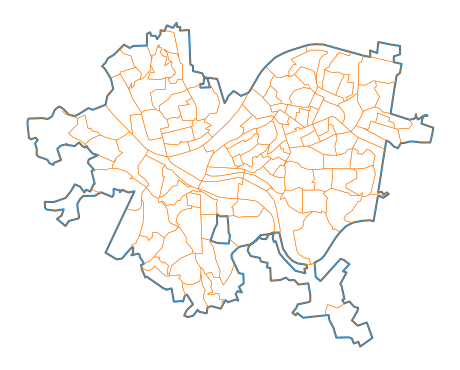

In [123]:
ax = gdf_pittsburgh.boundary.plot(
    linewidth=2,
    figsize=(8,8)
)

ax = gdf_pittsburgh_tracts.boundary.plot(
    color='C1',
    linewidth=0.5,
    ax=ax
)

_ = ax.axis('off')

In [124]:
## 4. Analysis!

gdf_pittsburgh_tracts['TOTAL_INCOME_SINGLE'] = gdf_pittsburgh_tracts[
    VARS_INCOME_SINGLE
].sum(axis='columns')
                                                            

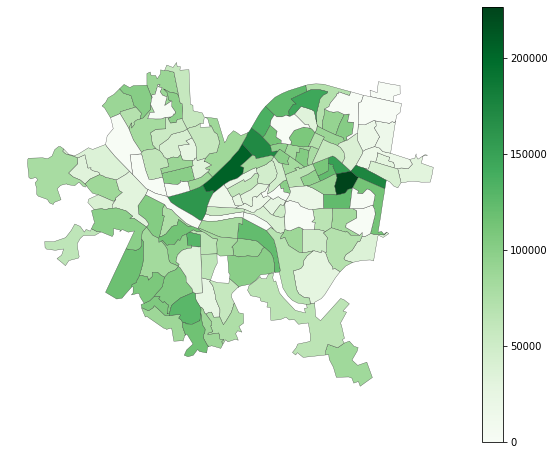

In [125]:
ax = gdf_pittsburgh_tracts.plot(
    'TOTAL_INCOME_SINGLE',
    
    cmap='Greens',
    edgecolor='#333',
    linewidth=0.3,
        
    legend=True,
    
    figsize=(10, 8)
)

_ = ax.axis('off')

In [126]:
gdf_pittsburgh_tracts.head()

,STATE,COUNTY,TRACT,NAME,B19215_002E,B19215_009E,index_large,geometry,TOTAL_INCOME_SINGLE
0,42,003,010301,"Census Tract 103.01, Allegheny County, Pennsylvania",NaN,NaN,0,"POLYGON ((-79.99462 40.43580, -79.99129 40.43488, -79.98677 40.43498, -79.97601 40.43637, -79.97366 40.43657, -79.97287 40.43653, -79.97292 40.43632, -79.97350 40.43388, -79.97583 40.43431, -79.98...",0.0
1,42,003,010302,"Census Tract 103.02, Allegheny County, Pennsylvania",NaN,54000.0,0,"POLYGON ((-79.99371 40.43892, -79.98646 40.43861, -79.98506 40.43854, -79.97755 40.43823, -79.97589 40.43815, -79.97355 40.43795, -79.97264 40.43769, -79.97287 40.43653, -79.97366 40.43657, -79.97...",54000.0
2,42,003,020100,"Census Tract 201, Allegheny County, Pennsylvania",99955.0,59429.0,0,"POLYGON ((-80.01538 40.44308, -80.00932 40.44430, -80.00334 40.44565, -80.00144 40.44619, -79.99976 40.44668, -79.99792 40.44727, -79.99613 40.44818, -79.99527 40.44689, -79.99477 40.44609, -79.99...",159384.0
3,42,003,020300,"Census Tract 203, Allegheny County, Pennsylvania",113351.0,92019.0,0,"POLYGON ((-79.99613 40.44818, -79.99240 40.45041, -79.99079 40.45159, -79.98062 40.45904, -79.97963 40.46008, -79.97602 40.46309, -79.97391 40.46587, -79.96807 40.46101, -79.97495 40.45629, -79.97...",205370.0
4,42,003,030500,"Census Tract 305, Allegheny County, Pennsylvania",NaN,15000.0,0,"POLYGON ((-79.99228 40.44173, -79.99214 40.44202, -79.99036 40.44459, -79.98704 40.44659, -79.98390 40.44852, -79.98365 40.44764, -79.98243 40.44649, -79.98034 40.44363, -79.97927 40.44287, -79.97...",15000.0


In [127]:
gdf_top_10 = gdf_pittsburgh_tracts.nlargest(
    10, 'TOTAL_INCOME_SINGLE'
)[['NAME', 'TOTAL_INCOME_SINGLE', 'geometry']].reset_index(drop = True)

gdf_top_10

,NAME,TOTAL_INCOME_SINGLE,geometry
0,"Census Tract 1404, Allegheny County, Pennsylvania",226459.0,"POLYGON ((-79.92158 40.44767, -79.92023 40.45122, -79.92071 40.45289, -79.91535 40.45361, -79.91242 40.45404, -79.90945 40.45204, -79.90819 40.45149, -79.91016 40.44876, -79.91080 40.44785, -79.91..."
1,"Census Tract 203, Allegheny County, Pennsylvania",205370.0,"POLYGON ((-79.99613 40.44818, -79.99240 40.45041, -79.99079 40.45159, -79.98062 40.45904, -79.97963 40.46008, -79.97602 40.46309, -79.97391 40.46587, -79.96807 40.46101, -79.97495 40.45629, -79.97..."
2,"Census Tract 1405, Allegheny County, Pennsylvania",174375.0,"POLYGON ((-79.90955 40.45669, -79.90789 40.45606, -79.90531 40.45548, -79.90313 40.45452, -79.90085 40.45362, -79.89876 40.45281, -79.89278 40.45030, -79.89242 40.45027, -79.89323 40.44649, -79.90..."
3,"Census Tract 603, Allegheny County, Pennsylvania",171287.0,"POLYGON ((-79.97156 40.46899, -79.97077 40.47066, -79.97004 40.47111, -79.96868 40.47275, -79.96385 40.46994, -79.96229 40.46871, -79.96090 40.46758, -79.95922 40.46623, -79.95796 40.46518, -79.95..."
4,"Census Tract 201, Allegheny County, Pennsylvania",159384.0,"POLYGON ((-80.01538 40.44308, -80.00932 40.44430, -80.00334 40.44565, -80.00144 40.44619, -79.99976 40.44668, -79.99792 40.44727, -79.99613 40.44818, -79.99527 40.44689, -79.99477 40.44609, -79.99..."
5,"Census Tract 708, Allegheny County, Pennsylvania",151895.0,"POLYGON ((-79.92510 40.45899, -79.92504 40.45995, -79.92272 40.46066, -79.92123 40.46005, -79.91807 40.45793, -79.91741 40.45748, -79.91242 40.45404, -79.91535 40.45361, -79.92071 40.45289, -79.92..."
6,"Census Tract 1018, Allegheny County, Pennsylvania",144197.0,"POLYGON ((-79.94737 40.47797, -79.94755 40.48008, -79.94500 40.48294, -79.94337 40.48297, -79.94630 40.48516, -79.93716 40.48843, -79.93509 40.48914, -79.92974 40.48911, -79.92553 40.48831, -79.92..."
7,"Census Tract 901, Allegheny County, Pennsylvania",135470.0,"POLYGON ((-79.96476 40.47792, -79.96318 40.47977, -79.96069 40.48206, -79.95570 40.47835, -79.95762 40.47613, -79.95805 40.47386, -79.95881 40.47282, -79.95979 40.47146, -79.96091 40.46980, -79.96..."
8,"Census Tract 1807, Allegheny County, Pennsylvania",129762.0,"POLYGON ((-80.00561 40.42701, -80.00384 40.42783, -79.99757 40.42671, -79.99753 40.42572, -79.99748 40.42372, -79.99740 40.42165, -79.99825 40.42144, -80.00247 40.42177, -80.00275 40.42227, -80.00..."
9,"Census Tract 3206, Allegheny County, Pennsylvania",127857.0,"POLYGON ((-80.01502 40.39295, -80.01398 40.39607, -80.01339 40.39668, -80.00878 40.39952, -80.00507 40.40075, -80.00161 40.40191, -80.00047 40.40156, -80.00037 40.40082, -80.00013 40.39902, -79.99..."


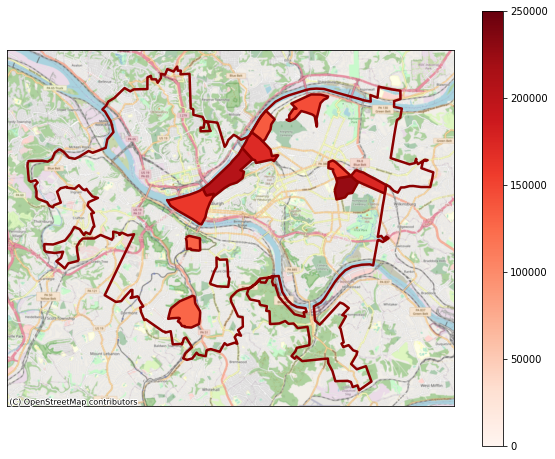

In [128]:
ax = cem.plot_map(
    gdf_top_10,
    'TOTAL_INCOME_SINGLE',
    
    cmap='Reds',
    edgecolor='darkred', 
    linewidth=2.5,
                
    vmin=0,
    vmax=250000,
    legend=True,
    
    figsize=(10, 8)
)

ax = cem.plot_map(
    gdf_pittsburgh.boundary,
    edgecolor="darkred",
    linewidth=2.5,
    ax=ax,
    with_background=True
)

In [129]:
#the top median income in pittsburgh is the north shore, strip district, lawrenceville, highland park, Point Breeze, Mt. Lebonon, 

In [130]:
#What is the median income for the top 10 households in Pittsburgh? 
df_groups[
    df_groups['DESCRIPTION'].str.contains('INCOME') &
    df_groups['DESCRIPTION'].str.contains('MEDIAN') &
    df_groups['DESCRIPTION'].str.contains('HOUSEHOLD') 
]

,DATASET,YEAR,GROUP,DESCRIPTION
276,acs/acs5,2021,B10010,MEDIAN FAMILY INCOME FOR FAMILIES WITH GRANDPARENT HOUSEHOLDERS AND/OR SPOUSES LIVING WITH OWN GRANDCHILDREN UNDER 18 YEARS BY RESPONSIBILITY FOR OWN GRANDCHILDREN AND PRESENCE OF PARENT OF GRANDC...
495,acs/acs5,2021,B19013,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)
496,acs/acs5,2021,B19013A,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE HOUSEHOLDER)
497,acs/acs5,2021,B19013B,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)
498,acs/acs5,2021,B19013C,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER)
499,acs/acs5,2021,B19013D,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (ASIAN ALONE HOUSEHOLDER)
500,acs/acs5,2021,B19013E,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE HOUSEHOLDER)
501,acs/acs5,2021,B19013F,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (SOME OTHER RACE ALONE HOUSEHOLDER)
502,acs/acs5,2021,B19013G,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (TWO OR MORE RACES HOUSEHOLDER)
503,acs/acs5,2021,B19013H,"MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)"
